<a href="https://colab.research.google.com/github/lawsonk16/Remote-Sensing-Datasets/blob/main/Experimental_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Options
Once you've converted a given dataset into the COCO format, this notebook provides what you need in order to:
 - chip large images to a different size

Here, the paths used are on FAIR1M in my own google drive, but switching up some file paths would let you use any coco dataset for these operations

<b> NOTE FOR COLAB USERS </b> For speed of processing, you will likely want to add whichever module you're looking for to the end of the notebook where you convert your data to the COCO format - since any files will already be locally available, just be sure to delete things as you go to avoid running out of space.

To Do:
 - GSD normalization
 - Chipping for classification
 - (more difficult) sliding chipping, or more complex chipping options

In [1]:
# first, mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# this notebook uses scripts available in my git repo
import sys
notebook_folders = ['/content/drive/MyDrive/Colab Notebooks/scripts/']

for folder in notebook_folders:
    sys.path.append(folder)

from coco_utils.coco_help import *

import shutil
import os

## Part 0 - Get your data

Regardless of your process, you will need access to some annotations and imagery - get that locally available, or else point to it

In [3]:
# Set up some base file paths

# where the data currently is, and where you want to operate on it
og_data_folder = '/content/drive/MyDrive/Colab Notebooks/SCHOOL/Final Project/Data/FAIR1M/ISPRS Benchmark/FAIR1M1.0/train/'
data_folder = '/content/ISPRS Benchmark/train/'

# where the json is
json_path = 'fair1m_coco.json'

# where the imagery will be
images = f'{data_folder}images/'

# where you will store your resulting files
dst_folder = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/'

In [4]:
# Copy any files you don't already have locally
shutil.copy('/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/fair1m_coco.json', '/content/')

shutil.copytree(og_data_folder, data_folder)

# note that you will have to change this unopacking process for a different dataset
shutil.unpack_archive(f'{data_folder}part1/images.zip', data_folder)
shutil.unpack_archive(f'{data_folder}part1/labelXml.zip', data_folder)
shutil.rmtree(f'{data_folder}part1/')
shutil.unpack_archive(f'{data_folder}part2/images.zip', data_folder)
shutil.unpack_archive(f'{data_folder}part2/labelXmls.zip', data_folder)
shutil.rmtree(f'{data_folder}part2/')

## 1 -  Image Chipping

#### 1.1 Sub-Chip Images
 - Remote sensing images are often too large to work with in detectors, without chipping the images down to a smaller size. This function allows you to choose a new image size, and point to a COCO file. It will:
  - Chip the images
  - Adjust the annotations to the new imagery

In [5]:
# set up paths to newly chipped images
chip_size = 400
new_image_folder = f'FAIR1M_{chip_size}_images/'

# subchip images
subchip_images(json_path, images, new_image_folder, chip_size)

100%|██████████| 16488/16488 [1:33:03<00:00,  2.95it/s]


New ground truth: fair1m_coco_400.json
New images: FAIR1M_400_images/


#### 1.2 Check the Results

<Figure size 432x288 with 0 Axes>

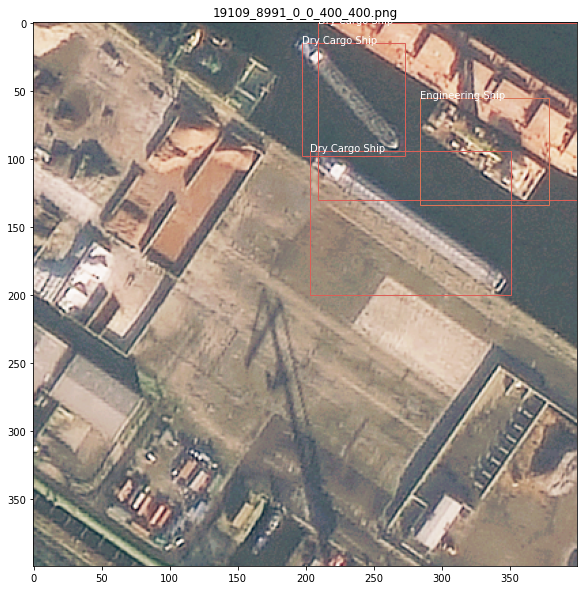

<Figure size 432x288 with 0 Axes>

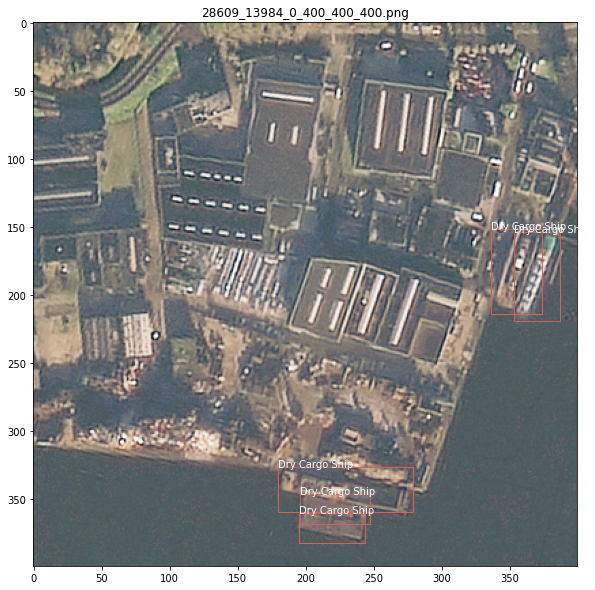

<Figure size 432x288 with 0 Axes>

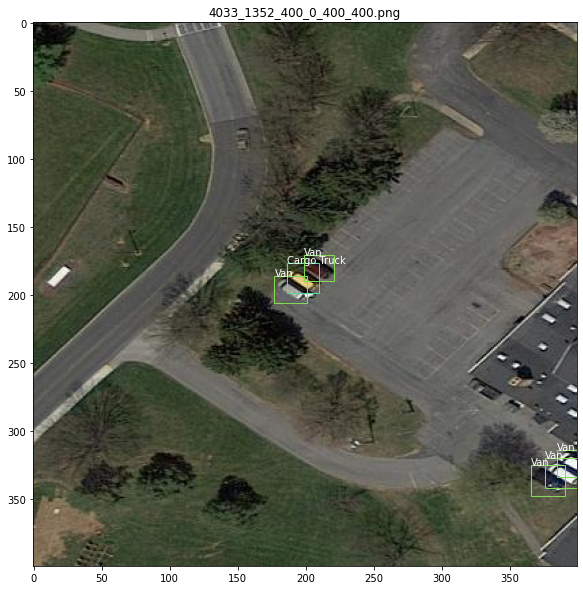

<Figure size 432x288 with 0 Axes>

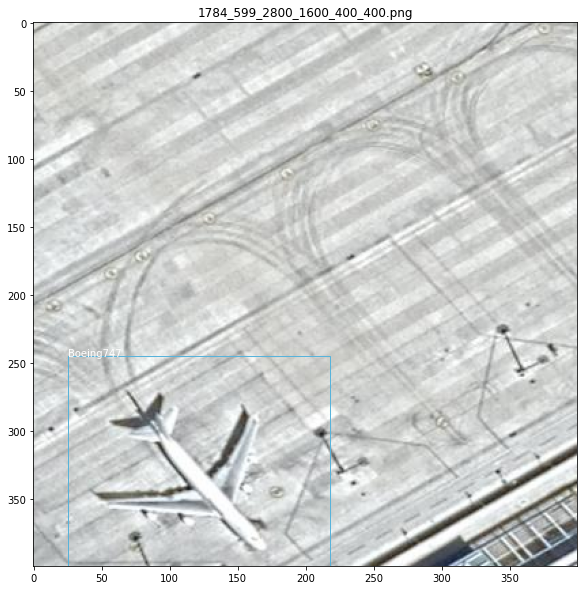

<Figure size 432x288 with 0 Axes>

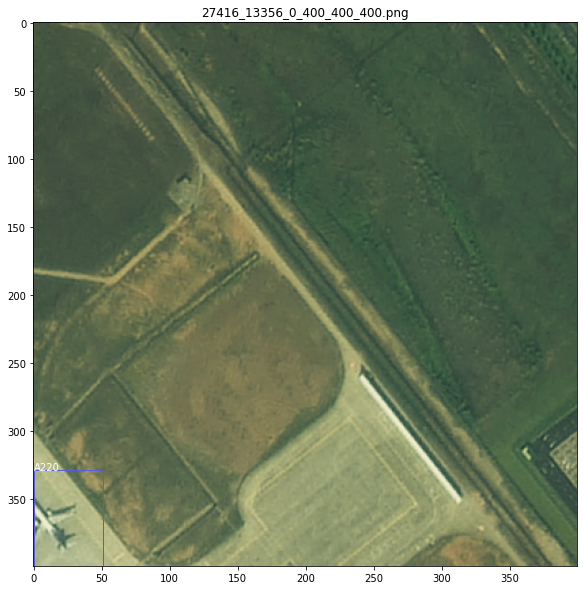

In [7]:
display_random_ims(5, f'/content/fair1m_coco_{chip_size}.json', f'/content/FAIR1M_{chip_size}_images/', (10,10))

#### (Optional) Move the files elsewhere
 - These file paths are absolute - change them to be relevant to your experimental parameters
 - If you are low on local storage, you can delete the pre-chipping imagery before creating your zip file 

In [6]:
# Zip up your new images
! zip -rq 'images_400.zip' '/content/FAIR1M_400_images/'

# Copy the annotations and imagery
shutil.copy2(f'images_{chip_size}.zip', dst_folder)
shutil.copy2(f'/content/fair1m_coco_{chip_size}.json', dst_folder)

'/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/fair1m_coco_400.json'